In [1]:
!pip install gym==0.24.1
!pip install pygame

  Using cached gym-0.24.1-py3-none-any.whl
  Attempting uninstall: gym
    Found existing installation: gym 0.21.0
    Uninstalling gym-0.21.0:
      Successfully uninstalled gym-0.21.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
stable-baselines3 1.5.0 requires gym==0.21, but you have gym 0.24.1 which is incompatible.
You should consider upgrading via the '/Users/mario/.pyenv/versions/3.9.6/bin/python3.9 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/mario/.pyenv/versions/3.9.6/bin/python3.9 -m pip install --upgrade pip' command.


In [2]:
import gym
import highway_env

env = gym.make('highwayadv-v0')
env.seed(0)

env.configure({"controlled_vehicles": 2})  # Two controlled vehicles
env.configure({"vehicles_count": 0})  # A single other vehicle, for the sake of visualisation
env.reset()

import pprint
pprint.pprint(env.config)

/Users/mario/Individual Code/highway-env-tibi/highway_env/vehicle/objects.py:33: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self.position = np.array(position, dtype=np.float)
/Users/mario/Individual Code/highway-env-tibi/highway_env/vehicle/controller.py:273: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more de

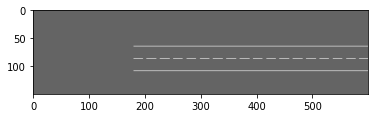

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline

env.config["lanes_count"] = 2
env.reset()
plt.imshow(env.render(mode="rgb_array"))
plt.show()

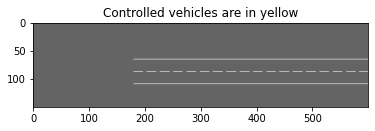

In [ ]:
actions = tuple(0 for agent in range(2))
for i in range(00):
    obs, reward, done, info = env.step(actions)
    # obs, reward, done, info = env.step(np.array([0.01, 0.1]))
    # obs, reward, done, info = env.step(0)
    env.render()
    
plt.imshow(env.render(mode="rgb_array"))
plt.title("Controlled vehicles are in yellow")
plt.show()

In [ ]:
!pip install stable-baselines3
!python -m pip uninstall pyserial --yes
!pip install protobuf==3.19.0
!export PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION=python


You should consider upgrading via the '/Users/mario/.pyenv/versions/3.9.6/bin/python3.9 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/mario/.pyenv/versions/3.9.6/bin/python3.9 -m pip install --upgrade pip' command.


In [ ]:

from stable_baselines3 import DQN

model = DQN('MlpPolicy', env,
              policy_kwargs=dict(net_arch=[256, 256]),
              learning_rate=5e-4,
              buffer_size=15000,
              learning_starts=200,
              batch_size=32,
              gamma=0.8,
              train_freq=1,
              gradient_steps=1,
              target_update_interval=50,
              verbose=1,
              tensorboard_log="highway_dqn/")
model.learn(int(2e4))
model.save("highway_dqn/model")

# Load and test saved model
model = DQN.load("highway_dqn/model")
while True:
  done = False
  obs = env.reset()
  while not done:
    action, _states = model.predict(obs, deterministic=True)
    obs, reward, done, info = env.step(action)
    env.render()

TypeError: Descriptors cannot not be created directly.
If this call came from a _pb2.py file, your generated code is out of date and must be regenerated with protoc >= 3.19.0.
If you cannot immediately regenerate your protos, some other possible workarounds are:
 1. Downgrade the protobuf package to 3.20.x or lower.
 2. Set PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION=python (but this will use pure-Python parsing and will be much slower).

More information: https://developers.google.com/protocol-buffers/docs/news/2022-05-06#python-updates

In [ ]:
# Load and test saved model
model = DQN.load("highway_dqn/model")
while True:
  done = False
  obs = env.reset()
  while not done:
    action, _states = model.predict(obs, deterministic=True)
    obs, reward, done, info = env.step(action)
    env.render()